In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorboard.notebook import display

from farich_functions import *

In [2]:
# %load_ext autoreload
# %autoreload 2

In [3]:
datadir = 'data'

In [4]:
# filepath = os.path.join(datadir, 'fullsim_optical_1000_pi_1500_no.root')
# filepath_fixed = os.path.join(datadir, 'fullsim_optical_1000_pi_1500_fixed.root')
# filepath_fixed = os.path.join(datadir, 'fullsim_optical_10000_pi_500_1500_FARICH_35mm_no.root')
filepath_fixed = os.path.join(datadir, 'fullsim_optical_10000_pi_500_1500_FARICH_35mm_no_no_trackers.root')
filepath_low_energies = os.path.join(datadir, 'fullsim_optical_10000_pi_500_800_FARICH_35mm_no_no_trackers.root')
# filepath_monodir = os.path.join(datadir, 'fullsim_optical_1000_pi_1500_monodir_no.root')
filepath_monodir = os.path.join(datadir, 'fullsim_optical_10000_pi_1500_monodir_FARICH_no.root')
filepath_binned = os.path.join(datadir, 'fullsim_optical_2000_pi_bin_1_FARICH_35mm_no_no_trackers.root')
# filepath_2pi = os.path.join(datadir, 'fullsim_optical_1000_pi_1500_2pi_phi.root')
# filepath_prototype = os.path.join(datadir, 'farichsim_10kevt.root')
# filepath_new = os.path.join(datadir, 'fullsim_optical_1000_pi_1500_spectre_test_3.root')

In [5]:
# file = uproot.open(filepath)
file = uproot.open(filepath_fixed)
file_low= uproot.open(filepath_low_energies)
# file = uproot.open(filepath_monodir)
# file_2pi = uproot.open(filepath_2pi)
# file_prototype = uproot.open(filepath_prototype)
# file_new = uproot.open(filepath_new)

In [6]:
plt.style.use('default')

In [7]:
int(str(file.keys()[0]).split(';')[1][:-1])

9

In [8]:
# plot_cyl(file, transposed=True)

# Main (tmp obv)

In [9]:
def init_sipm_eff():
    pdes_tmp = pd.read_csv('PDE.csv', sep=';', names=['A'])
    t1 = []
    t2 = []
    for inedx, row in pdes_tmp.iterrows():
        t1.append(float(row['A'].split(';')[0].replace(',', '.')))
        t2.append(float(row['A'].split(';')[1].replace(',', '.')))
    PDE_wvs = np.linspace(200, 900, 128)
    PDEs = np.interp(PDE_wvs, t1, t2, left=0, right=0)
    sipm_eff = fix_PDE_plot(PDEs, PDE_wvs)
    return sipm_eff, PDE_wvs

In [10]:
sipm_eff, PDE_wvs = init_sipm_eff()

In [11]:
max(sipm_eff.values())

0.55414

максисмальное значение в старом моделировании - 38%

In [12]:
for key in sipm_eff.keys():
    sipm_eff[key] = sipm_eff[key] / 0.55414 * 0.38

In [13]:
max(sipm_eff.values())

0.38

In [14]:
x_grid = np.arange(-3*norm_r * np.sin(np.pi / 27), 3*norm_r * np.sin(np.pi / 27), SIPM_CELL_SIZE)
z_grid = np.arange(-1400, 1400, SIPM_CELL_SIZE)
grid = (x_grid, z_grid, PDE_wvs)

In [15]:
def init_coords(file, MAXIMUM_EVENT_GROUP_NUMBER):
    x = np.array(file[f'events;{MAXIMUM_EVENT_GROUP_NUMBER}']['FarichBarrelG4Hits.postStepPosition.x'].array())
    y = np.array(file[f'events;{MAXIMUM_EVENT_GROUP_NUMBER}']['FarichBarrelG4Hits.postStepPosition.y'].array())
    z = np.array(file[f'events;{MAXIMUM_EVENT_GROUP_NUMBER}']['FarichBarrelG4Hits.postStepPosition.z'].array())
    wvs = 1239.841 / np.array(file[f'events;{MAXIMUM_EVENT_GROUP_NUMBER}']['FarichBarrelG4Hits.energy'].array()) * 1e-9
    x3 = np.array(file[f'events;{MAXIMUM_EVENT_GROUP_NUMBER}']['allGenParticles.core.p4.px'].array())
    y3 = np.array(file[f'events;{MAXIMUM_EVENT_GROUP_NUMBER}']['allGenParticles.core.p4.py'].array())
    z3 = np.array(file[f'events;{MAXIMUM_EVENT_GROUP_NUMBER}']['allGenParticles.core.p4.pz'].array())
    true_direction_coordinates = np.column_stack((x3, y3, z3))
    for i in range(len(wvs)):
        wvs[i] = lin_move_to_grid(wvs[i], grid[2])
    coordinates = np.column_stack((x, y, z, wvs))
    return coordinates, true_direction_coordinates

In [16]:
MAXIMUM_EVENT_GROUP_NUMBER = 9 # 13
MAXIMUM_EVENT_GROUP_NUMBER_LOW = 6

In [17]:
# coordinates, true_direction_coordinates = init_coords(file, MAXIMUM_EVENT_GROUP_NUMBER)

In [18]:
# coordinates_low, true_direction_coordinates_low = init_coords(file_low, MAXIMUM_EVENT_GROUP_NUMBER_LOW)

In [19]:
# coordinates = np.concatenate((coordinates, coordinates_low), axis=0)
# true_direction_coordinates = np.concatenate((true_direction_coordinates, true_direction_coordinates_low), axis=0)

In [20]:
filepath_binned = os.path.join(datadir, f'fullsim_optical_2000_pi_bin_{1}_FARICH_35mm_no_no_trackers.root')
file_binned = uproot.open(filepath_binned)
coordinates, true_direction_coordinates = init_coords(file_binned, int(str(file_binned.keys()[0]).split(';')[1][:-1]))
for i in range(2, 11):
    filepath_binned = os.path.join(datadir, f'fullsim_optical_2000_pi_bin_{i}_FARICH_35mm_no_no_trackers.root')
    file_binned = uproot.open(filepath_binned)
    coordinates_i, true_direction_coordinates_i = init_coords(file_binned, int(str(file_binned.keys()[0]).split(';')[1][:-1]))
    coordinates = np.concatenate((coordinates, coordinates_i), axis=0)
    true_direction_coordinates = np.concatenate((true_direction_coordinates, true_direction_coordinates_i), axis=0)

In [21]:
# coordinates = np.column_stack((x, y, z, wvs))

coordinates.shape

(20000, 4)

In [22]:
idx_to_drop = []
for i in range(coordinates.shape[0]):
    if coordinates[i][0].shape[0] == 0:
        idx_to_drop.append(i)

In [23]:
coordinates = np.delete(coordinates, idx_to_drop, axis=0)
# drift_chamber_coordinates = np.delete(drift_chamber_coordinates, idx_to_drop, axis=0)
# tpc_coordinates = np.delete(tpc_coordinates, idx_to_drop, axis=0)
true_direction_coordinates = np.delete(true_direction_coordinates, idx_to_drop, axis=0)
print(coordinates.shape)
# print(drift_chamber_coordinates.shape)
# print(tpc_coordinates.shape)
print(true_direction_coordinates.shape)

(19988, 4)
(19988, 3)


In [24]:
# ev = 123
# plot_event(coordinates[ev], None, None, np.stack([np.concatenate(true_direction_coordinates[ev]), np.concatenate(true_direction_coordinates[ev] * 3000)], axis=1))
# То есть есть события, когда направление первичной частицы не попадает в кольцо. Почему?


In [25]:
sipm_sim(coordinates, sipm_eff)

In [26]:
# plot_cyl(file, coordinates, True)

In [27]:
idx_to_drop = []
for i in range(coordinates.shape[0]):
    if coordinates[i][0].shape[0] == 0:
        idx_to_drop.append(i)
coordinates = np.delete(coordinates, idx_to_drop, axis=0)
# drift_chamber_coordinates = np.delete(drift_chamber_coordinates, idx_to_drop, axis=0)
# tpc_coordinates = np.delete(tpc_coordinates, idx_to_drop, axis=0)
true_direction_coordinates = np.delete(true_direction_coordinates, idx_to_drop, axis=0)

print(coordinates.shape)
# print(drift_chamber_coordinates.shape)
# print(tpc_coordinates.shape)
print(true_direction_coordinates.shape)

(19871, 4)
(19871, 3)


In [28]:
main_angles = rotate_lines(true_direction_coordinates)

In [29]:
intersections = find_intersections(true_direction_coordinates)

[array([0.00120069]) array([0.38860658]) array([0.35055417])]


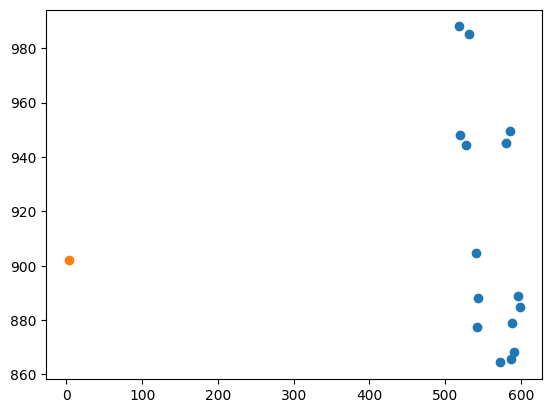

In [30]:

num = 30 # unturned events
# plt.scatter(rotate_event(coordinates[0], main_angles[0])[:,0], rotate_event(coordinates[0], main_angles[0])[:,2])
plt.scatter(coordinates[num][0], coordinates[num][2])
plt.scatter(intersections[num][0], intersections[num][2])
print(true_direction_coordinates[num])
plt.show()

In [31]:
rotate_events(coordinates, main_angles)

In [32]:
# plot_cyl(file, coordinates)

In [33]:
move_events_to_grid(coordinates, grid)

In [34]:
# plot_cyl(file, coordinates, True)

In [35]:
r_c = (coordinates[:,0] - intersections[:,0]) ** 2 + (coordinates[:,1] - intersections[:,1]) ** 2

In [36]:
repeat_nums = np.array([coord[0].shape[0] for coord in coordinates])

In [37]:
edf = pd.DataFrame(coordinates, columns=['x_c', 'y_c', 'z_c', 'wv_c'])
edf['r_c'] = r_c

In [38]:
unraveled_data = {col: [] for col in edf.columns}
row_indices = []

# Iterate over the DataFrame and unravel the arrays
for i, row in edf.iterrows():
    max_length = max(len(row[col]) for col in edf.columns)
    for k in range(max_length):
        row_indices.append((i, k))
        for col in edf.columns:
            if k < len(row[col]):
                unraveled_data[col].append(row[col][k])
            else:
                unraveled_data[col].append(np.nan)  # Handle cases where arrays are of different lengths

# Create a new DataFrame from the unraveled data
unraveled_df = pd.DataFrame(unraveled_data)

# Create a MultiIndex for the rows
multi_index = pd.MultiIndex.from_tuples(row_indices, names=['entry', 'subentry'])
unraveled_df.index = multi_index


In [39]:
unraveled_df['r_c'] = np.sqrt(unraveled_df.r_c)

In [40]:
edf = unraveled_df

In [41]:
edf['x_i'] = np.repeat(intersections[:,0], repeat_nums, axis=0)
edf['z_i'] = np.repeat(intersections[:,2], repeat_nums, axis=0)

In [42]:
x = y = z = x3 = y3 = z3 = unraveled_data = row_indices = main_angles = intersections = wvs = coordinates = file = coordinates_low = file_low = 0

In [43]:
bdf = pd.DataFrame()

edf['t_c'] = np.zeros(edf.shape[0])
edf.drop('y_c', axis=1, inplace=True)
edf.rename(columns={'z_c': 'y_c', 'z_i': 'y_i'}, inplace=True)
edf['z_c'] = np.zeros(edf.shape[0]) + 2000
edf['true_p'] = np.repeat(np.linalg.norm(true_direction_coordinates.astype('float'), axis=1)*1000, repeat_nums, axis=0)
edf['beta'] = edf.true_p / np.sqrt(139.57 ** 2 + edf.true_p ** 2)
edf['nx_p'] = np.repeat((true_direction_coordinates / np.array([np.linalg.norm(true_direction_coordinates.astype('float'), axis=1) for i in range(3)]).T).astype('float')
[:,0], repeat_nums, axis=0)
edf['ny_p'] = np.repeat((true_direction_coordinates / np.array([np.linalg.norm(true_direction_coordinates.astype('float'), axis=1) for i in range(3)]).T).astype('float')
[:,2], repeat_nums, axis=0)
edf['nz_p'] = np.repeat((true_direction_coordinates / np.array([np.linalg.norm(true_direction_coordinates.astype('float'), axis=1) for i in range(3)]).T).astype('float')
[:,1], repeat_nums, axis=0)

C:\Users\BRINE\AppData\Local\Temp\ipykernel_18872\2006563156.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  edf['true_p'] = np.repeat(np.linalg.norm(true_direction_coordinates.astype('float'), axis=1)*1000, repeat_nums, axis=0)
C:\Users\BRINE\AppData\Local\Temp\ipykernel_18872\2006563156.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  edf['nx_p'] = np.repeat((true_direction_coordinates / np.array([np.linalg.norm(true_direction_coordinates.astype('float'), axis=1) for i in range(3)]).T).astype('float')
C:\Users\BRINE\AppData\Local\Temp\ipykernel_18872\2006563156.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a 

In [44]:
true_direction_coordinates.shape

(19871, 3)

In [45]:
true_direction_coordinates = repeat_nums = true_direction_coordinates_low = 0

In [46]:
edf.shape[0]

566079

In [47]:
idf = pd.DataFrame()
idf['W'] = [35.]
# idf['W'] = [40.]

idf['zdis'] = [800.]
idf['distance'] = [205.] # 200
idf['n_mean'] = [1.04511]
# 
# idf['n_mean'] = [1.0502]

idf['pixel_size'] = [3.16]

In [48]:
idf

W   zdis  distance   n_mean  pixel_size
0  35.0  800.0     205.0  1.04511        3.16

In [49]:
edf = applySpaceCut(edf)

In [50]:
planeRecalculation(edf, idf)

Z:\Prog\FARICH\farich_functions.py:516: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  alpha = (float(dist)) / N[:, 2]
Z:\Prog\FARICH\farich_functions.py:529: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edf["t_c"] = edf["t_c"] + np.sign(R_new[:, 2] - R[:, 2]) * t_dif
Z:\Prog\FARICH\farich_functions.py:531: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edf["recalculated_x"] = R_new[:, 0]
Z:\Prog\FARICH\farich_

In [51]:
edf['x_p'] = np.zeros(edf.shape[0])
edf['y_p'] = np.zeros(edf.shape[0])
edf['z_p'] = np.zeros(edf.shape[0])


C:\Users\BRINE\AppData\Local\Temp\ipykernel_18872\210028248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edf['x_p'] = np.zeros(edf.shape[0])
C:\Users\BRINE\AppData\Local\Temp\ipykernel_18872\210028248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edf['y_p'] = np.zeros(edf.shape[0])
C:\Users\BRINE\AppData\Local\Temp\ipykernel_18872\210028248.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [52]:
planeRotation(edf)

Z:\Prog\FARICH\farich_functions.py:574: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edf["rotated_x"] = rotated_R[:, 0]
Z:\Prog\FARICH\farich_functions.py:575: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edf["rotated_y"] = rotated_R[:, 1]
Z:\Prog\FARICH\farich_functions.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [53]:
edf = applySecondSpaceCut(edf)

In [54]:
edf_to_bdf(edf.r_c.groupby(level=0).transform('mean'), bdf)
bdf.rename(columns={'r_c': 'r_c_mean'}, inplace=True)
edf_to_bdf(edf.r_c.groupby(level=0).transform('std'), bdf)
bdf.rename(columns={'r_c': 'r_c_std'}, inplace=True)
edf_to_bdf(edf.r_c.groupby(level=0).transform(lambda x: x.max() - x.min()), bdf)
bdf.rename(columns={'r_c': 'r_c_width'}, inplace=True)
edf_to_bdf(edf.true_p, bdf)
bdf.rename(columns={'true_p': 'momentum'}, inplace=True)
edf_to_bdf(edf.beta, bdf)

In [55]:
edf

x_c     y_c        wv_c        r_c        x_i  \
entry subentry                                                         
0     0          89.440131  115.36  492.125984  18.200929  71.239201   
      1          72.640131  122.08  414.960630   1.400929  71.239201   
      2          99.520131  108.64  409.448819  28.280929  71.239201   
      3          89.440131   78.40  326.771654  18.200929  71.239201   
      4          92.800131  118.72  762.204724  21.560929  71.239201   
...                    ...     ...         ...        ...        ...   
19870 52        136.480131  659.68  668.503937  61.329039  75.151092   
      53         22.240131  639.52  409.448819  52.910961  75.151092   
      54        139.840131  659.68  370.866142  64.689039  75.151092   
      55        123.040131  629.44  486.614173  47.889039  75.151092   
      56          8.800131  700.00  337.795276  66.350961  75.151092   

                       y_i       t_c     z_c       true_p      beta  ...  z_p  \
entry subentry                                                       ...        
0     0         102.379707 -0.008724  2000.0   522.711615  0.966152  ...  0.0   
      1         102.379707 -0.007035  2000.0   522.711615  0.966152  ...  0.0   
      2         102.379707 -0.008825  2000.0   522.711615  0.966152  ...  0.0   
      3         102.379707  0.003860  2000.0   522.711615  0.966152  ...  0.0   
      4         102.379707 -0.010658  2000.0   522.711615  0.966152  ...  0.0   
...                    ...       ...     ...          ...       ...  ...  ...   
19870 52        664.462288 -0.004492  2000.0  1272.214168  0.994036  ...  0.0   
      53        664.462288  0.065432  2000.0  1272.214168  0.994036  ...  0.0   
      54        664.462288 -0.005284  2000.0  1272.214168  0.994036  ...  0.0   
      55        664.462288  0.062603  2000.0  1272.214168  0.994036  ...  0.0   
      56        664.462288 -0.057836  2000.0  1272.214168  0.994036  ...  0.0   

                 rotated_x   rotated_y    rotated_z  rotated_x_i  rotated_y_i  \
entry subentry                                                                  
0     0         -52.466763  -88.548961  2000.059574   -70.691463  -101.592538   
      1         -69.241414  -81.853183  2000.059574   -70.691463  -101.592538   
      2         -42.409024  -95.253216  2000.059574   -70.691463  -101.592538   
      3         -52.501055 -125.636412  2000.059574   -70.691463  -101.592538   
      4         -49.110567  -85.184010  2000.059574   -70.691463  -101.592538   
...                    ...         ...          ...          ...          ...   
19870 52         -1.181052 -556.858143  2034.248622   -62.470840  -552.347496   
      53       -116.696101 -581.591909  2034.248622   -62.470840  -552.347496   
      54          2.167564 -556.810284  2034.248622   -62.470840  -552.347496   
      55        -14.245643 -591.644652  2034.248622   -62.470840  -552.347496   
      56       -127.471671 -513.907481  2034.248622   -62.470840  -552.347496   

                rotated_z_i  rotated_nx_p  rotated_ny_p  rotated_nz_p  
entry subentry                                                         
0     0         2000.059574     -0.035277     -0.050698      0.998091  
      1         2000.059574     -0.035277     -0.050698      0.998091  
      2         2000.059574     -0.035277     -0.050698      0.998091  
      3         2000.059574     -0.035277     -0.050698      0.998091  
      4         2000.059574     -0.035277     -0.050698      0.998091  
...                     ...           ...           ...           ...  
19870 52        2034.248622     -0.029623     -0.261921      0.964634  
      53        2034.248622     -0.029623     -0.261921      0.964634  
      54        2034.248622     -0.029623     -0.261921      0.964634  
      55        2034.248622     -0.029623     -0.261921      0.964634  
      56        2034.248622     -0.029623     -0.261921      0.964634  

[561598 rows x 28 columns]

In [56]:
bdf.isna().sum()

r_c_mean      0
r_c_std      51
r_c_width     0
momentum      0
beta          0
dtype: int64

In [57]:
primaryDirectionRecalculation(edf)

In [58]:
edf['rotated_r_c'] = np.sqrt((edf['rotated_x_i'] - edf['rotated_x']) ** 2 + (edf['rotated_y_i'] - edf['rotated_y']) ** 2)
edf['signal'] = np.ones(edf.shape[0])

In [59]:
recoAngles(edf, idf)

Z:\Prog\FARICH\farich_functions.py:649: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dist = float(idf["distance"])
Z:\Prog\FARICH\farich_functions.py:652: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  W = float(idf["W"])
Z:\Prog\FARICH\farich_functions.py:655: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rad_pos = float(idf["zdis"])


In [60]:
recoAngles(edf, idf, rotation_mode=True)

Z:\Prog\FARICH\farich_functions.py:649: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dist = float(idf["distance"])
Z:\Prog\FARICH\farich_functions.py:652: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  W = float(idf["W"])
Z:\Prog\FARICH\farich_functions.py:655: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rad_pos = float(idf["zdis"])
Z:\Prog\FARICH\farich_functions.py:676: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  n_mean = float(idf["n_mean"])


In [61]:
calculateSignalCounts(edf, bdf)

In [62]:
avg_sigmas = (4, 5)
avg_t_sigmas = (4, 5)
num_of_groups = 10
what_to_group = 'beta'
r_width = float(idf.pixel_size.iloc[0]) * 2
t_width = 0.25
t_step = 0.25
r_factor = 2 # not to change
t_factor = int(t_width / t_step)
weighed = True
deg_lim = False
param_fit = True
useuse_decision_tree = True


calibration_func = pol2 # pol
param_calibration_func = pol2_pol2 # d3pol2
p0 =  (.01, 1000, 1000)
p0_c =  (1.219, -0.5588, 0.2946, 864.4, -1922, 1055, -2535, 6572, -3751)
num_of_calibration_params = 3 # 3
num_of_param_fit_params = 3 # for param fit both prev and this number are important, cal_func as well, therefore p0 and p0_C
target_variable = 'beta'
target_angle = 'theta_p'
num_of_theta_intervals = 11 # 11


# sample_size = 12
cal_arr = False
errs = False

beta_sigms = []
beta_sigms_yerr = []
beta_sigms_deglim = []
beta_sigms_yerr_deglim = []

In [63]:
cal_arr, errs = rSlidingWindow(edf, idf, bdf, avg_sigmas=avg_sigmas, avg_t_sigmas=avg_t_sigmas, cal_arr=cal_arr, num_of_groups=num_of_groups,
                               step=r_width, t_window_width=t_width, r_width_factor=r_factor, t_width_factor=t_factor, weighed=weighed, deg_lim=deg_lim, param_fit=param_fit, 
                         calibration_func=calibration_func, param_calibration_func=param_calibration_func, num_of_calibration_params=num_of_calibration_params, num_of_param_fit_params=num_of_param_fit_params, 
                         target_variable=target_variable, target_angle=target_angle, num_of_theta_intervals=num_of_theta_intervals, p0=p0, p0_c=p0_c, what_to_group=what_to_group, use_decision_tree=useuse_decision_tree)

Z:\Prog\FARICH\farich_functions.py:783: RuntimeWarning: invalid value encountered in scalar divide
  return weighted_sum / weighted_den
Z:\Prog\FARICH\farich_functions.py:783: RuntimeWarning: invalid value encountered in scalar divide
  return weighted_sum / weighted_den
Z:\Prog\FARICH\farich_functions.py:783: RuntimeWarning: invalid value encountered in scalar divide
  return weighted_sum / weighted_den
Z:\Prog\FARICH\farich_functions.py:783: RuntimeWarning: invalid value encountered in scalar divide
  return weighted_sum / weighted_den
Z:\Prog\FARICH\farich_functions.py:783: RuntimeWarning: invalid value encountered in scalar divide
  return weighted_sum / weighted_den
Z:\Prog\FARICH\farich_functions.py:783: RuntimeWarning: invalid value encountered in scalar divide
  return weighted_sum / weighted_den
Z:\Prog\FARICH\farich_functions.py:783: RuntimeWarning: invalid value encountered in scalar divide
  return weighted_sum / weighted_den
Z:\Prog\FARICH\farich_functions.py:783: RuntimeW

[[XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...)                ]]
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enabl

need to run twice. To remove broken events?

In [64]:
ы

NameError: name 'ы' is not defined

In [85]:
errs[0][0]

array([[1.53744088e-03, 8.19827948e-05, 1.07174608e-06],
       [1.38300742e-03, 7.33363645e-05, 9.53159128e-07],
       [1.45767361e-03, 7.60343668e-05, 9.76824761e-07],
       [1.54309997e-03, 7.88329246e-05, 9.88134311e-07],
       [1.45163629e-03, 7.30771463e-05, 8.98650896e-07],
       [1.70079734e-03, 8.05057334e-05, 9.33515268e-07],
       [1.48343886e-03, 6.72869059e-05, 7.44528634e-07],
       [1.39313242e-03, 5.89372940e-05, 6.07291296e-07],
       [1.24854873e-03, 4.93129595e-05, 4.73118309e-07],
       [1.75341310e-03, 6.80616136e-05, 6.40229698e-07]])

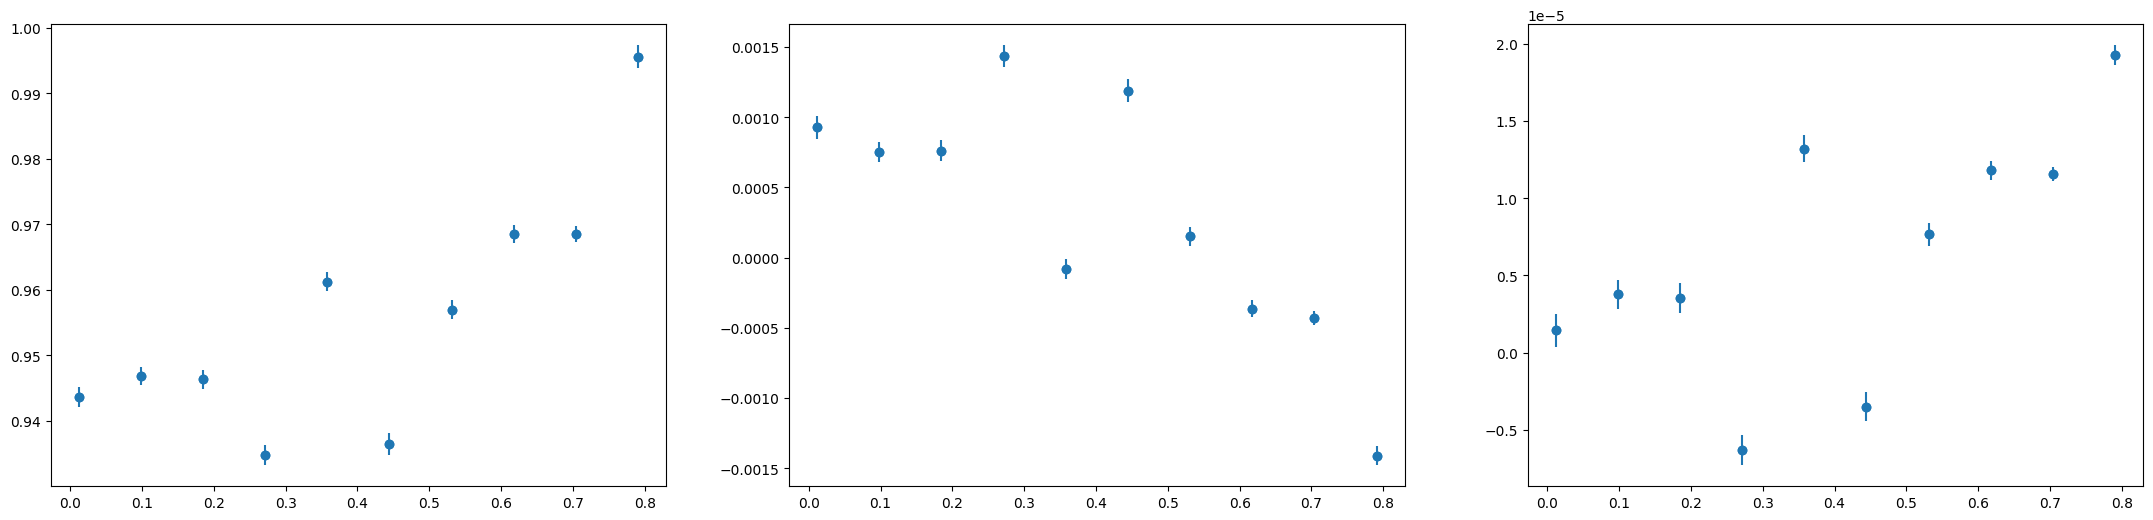

In [88]:
plt.subplots(1, 3, figsize=(27, 6))
plt.subplot(1, 3, 1)
plt.scatter(np.linspace(min(bdf.theta_p), max(bdf.theta_p), num=num_of_theta_intervals-1), cal_arr[0][0][:, 0])
plt.errorbar(np.linspace(min(bdf.theta_p), max(bdf.theta_p), num=num_of_theta_intervals-1), cal_arr[0][0][:, 0], yerr=errs[0][0][:, 0], fmt='o')
# plt.ylim(())
plt.subplot(1, 3, 2)
plt.scatter(np.linspace(min(bdf.theta_p), max(bdf.theta_p), num=num_of_theta_intervals-1), cal_arr[0][0][:, 1])
plt.errorbar(np.linspace(min(bdf.theta_p), max(bdf.theta_p), num=num_of_theta_intervals-1), cal_arr[0][0][:, 1], yerr=errs[0][0][:, 1], fmt='o')
plt.subplot(1, 3, 3)
plt.scatter(np.linspace(min(bdf.theta_p), max(bdf.theta_p), num=num_of_theta_intervals-1), cal_arr[0][0][:, 2])
plt.errorbar(np.linspace(min(bdf.theta_p), max(bdf.theta_p), num=num_of_theta_intervals-1), cal_arr[0][0][:, 2], yerr=errs[0][0][:, 2], fmt='o')
plt.show()

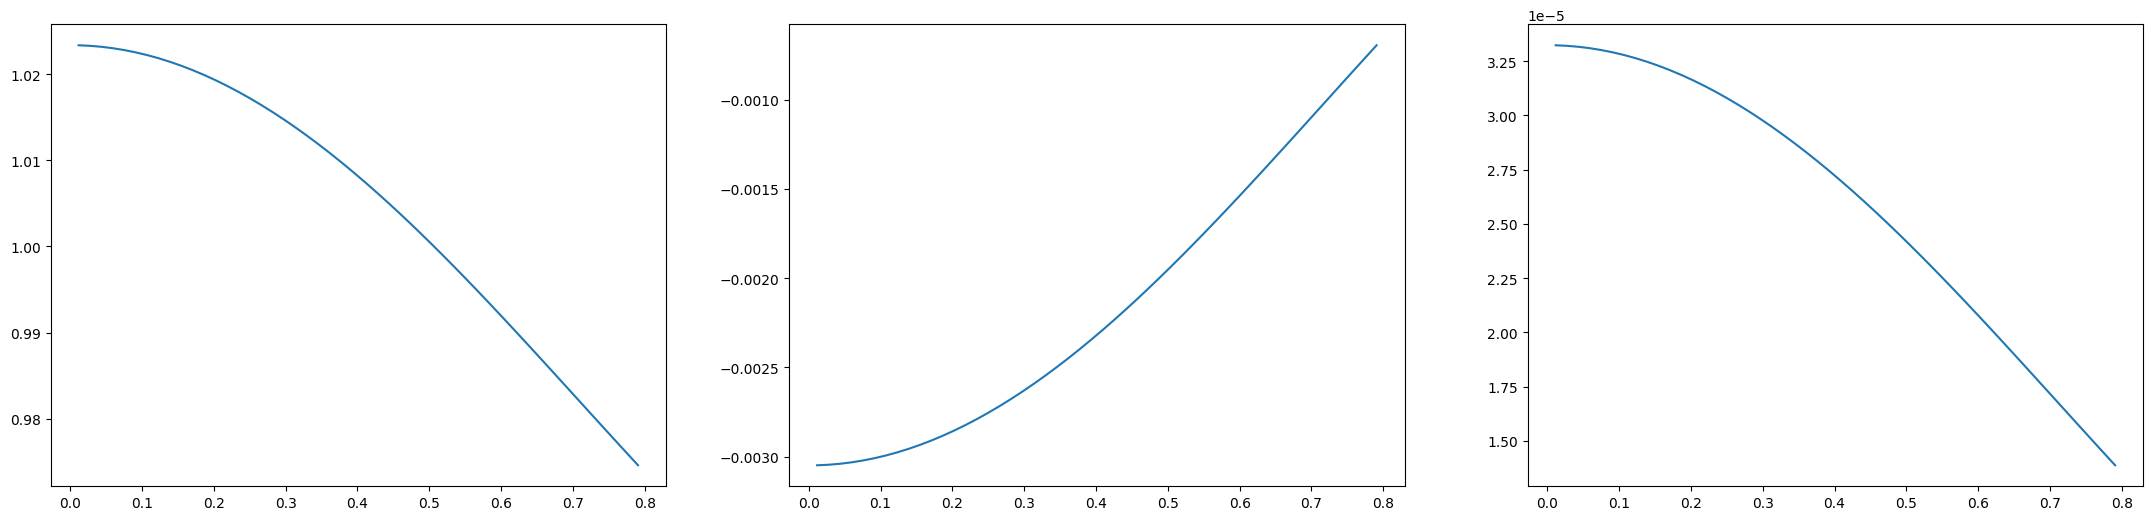

In [91]:
plt.subplots(1, 3, figsize=(27, 6))

plt.subplot(1, 3, 1)
plt.plot((np.linspace(min(bdf.theta_p), max(bdf.theta_p))), pol2(np.cos(np.linspace(min(bdf.theta_p), max(bdf.theta_p))), *cal_arr[0][0][0:3]))
# plt.ylim((0.945, 0.964))
plt.subplot(1, 3, 2)
plt.plot((np.linspace(min(bdf.theta_p), max(bdf.theta_p))), pol2(np.cos(np.linspace(min(bdf.theta_p), max(bdf.theta_p))), *cal_arr[0][0][3:6]))
# plt.ylim((-27, 12))
plt.subplot(1, 3, 3)
plt.plot((np.linspace(min(bdf.theta_p), max(bdf.theta_p))), pol2(np.cos(np.linspace(min(bdf.theta_p), max(bdf.theta_p))), *cal_arr[0][0][6:9]))
# plt.ylim((300, 390))
plt.show()

In [84]:
np.sqrt(errs[0][0][0] ** 2 + errs[0][0][1] ** 2 * bdf.theta_p ** 2 + errs[0][0][2] ** 2 * bdf.theta_p ** 4 + 
        (errs[0][0][3] ** 2 + errs[0][0][4] ** 2 * bdf.theta_p ** 2 + errs[0][0][5] ** 2 * bdf.theta_p ** 4) * bdf.unfixed_calculated_r_2d_4_rsigms_4_tsigms ** 2 +
        (errs[0][0][6] ** 2 + errs[0][0][7] ** 2 * bdf.theta_p ** 2 + errs[0][0][8] ** 2 * bdf.theta_p ** 4) * bdf.unfixed_calculated_r_2d_4_rsigms_4_tsigms ** 4)

ValueError: operands could not be broadcast together with shapes (3,) (19747,) 

In [65]:
bdf['beta_error'] = np.sqrt(errs[0][0][0] ** 2 + errs[0][0][1] ** 2 * bdf.theta_p ** 2 + errs[0][0][2] ** 2 * bdf.theta_p ** 4 + 
        (errs[0][0][3] ** 2 + errs[0][0][4] ** 2 * bdf.theta_p ** 2 + errs[0][0][5] ** 2 * bdf.theta_p ** 4) * bdf.unfixed_calculated_r_2d_4_rsigms_4_tsigms ** 2 +
        (errs[0][0][6] ** 2 + errs[0][0][7] ** 2 * bdf.theta_p ** 2 + errs[0][0][8] ** 2 * bdf.theta_p ** 4) * bdf.unfixed_calculated_r_2d_4_rsigms_4_tsigms ** 4)

In [91]:
bdf['chi2'] = (bdf.delta_beta_4_rsigms_4_tsigms / bdf.beta_error )

In [90]:
np.max(bdf.chi2)

312.0284518481575

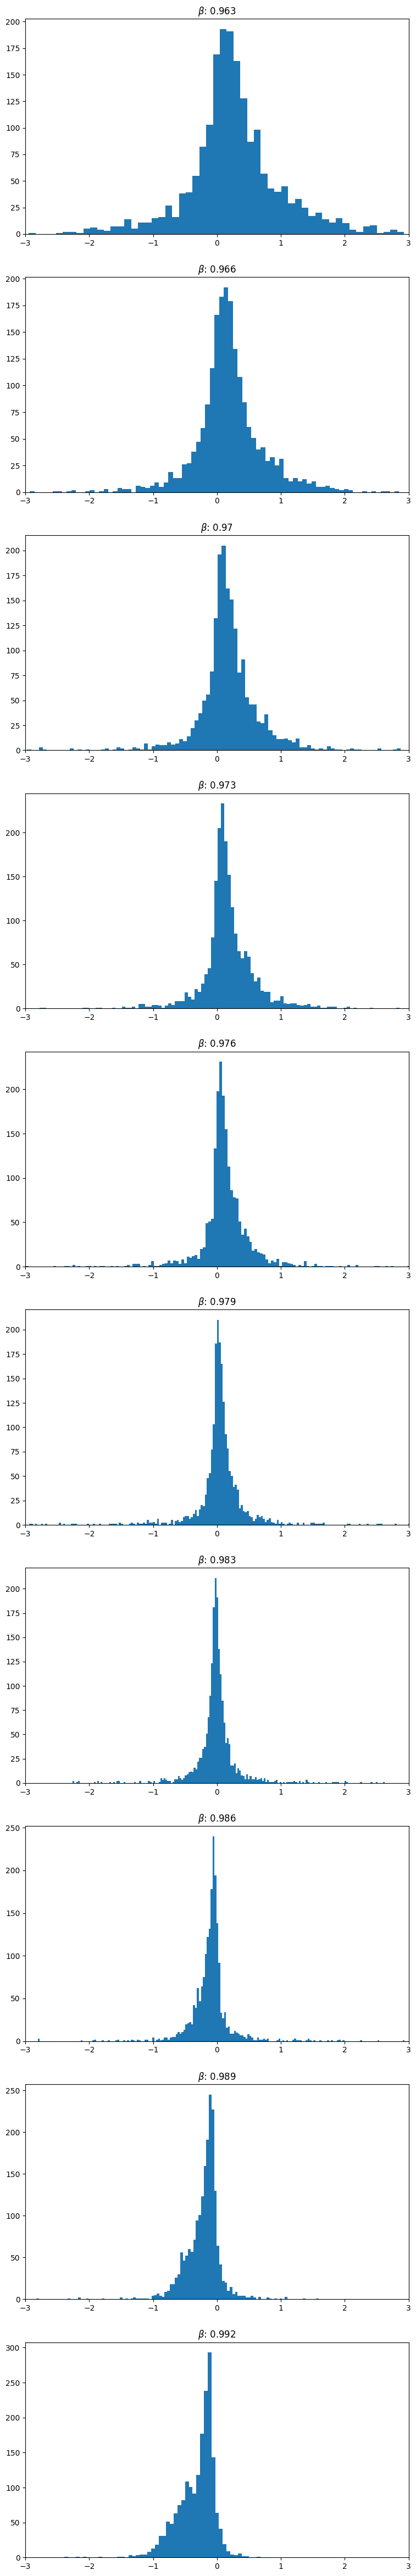

In [118]:
plt.subplots(10, 1, figsize=(9, 60))
beta_in_group = (
        np.arange(1, num_of_groups + 1) * (max(edf["beta"]) - min(edf["beta"]))
        - max(edf["beta"])
        + (num_of_groups + 1) * min(edf["beta"])
    ) / num_of_groups
for group in range(1, 11):
    bdf_group = bdf[bdf.param_group == group]
    plt.subplot(10, 1, group)
    plt.hist((bdf_group.chi2), bins='auto')
    plt.title(fr'$\beta$: {round(beta_in_group[group - 1], 3)}')
    plt.xlim((-3, 3))
# plt.xscale('log')   
plt.show()

array([0.9631789 , 0.96643086, 0.96968283, 0.97293479, 0.97618675,
       0.97943871, 0.98269067, 0.98594263, 0.98919459, 0.99244655])

In [86]:
((bdf.beta - bdf.beta_from_calc_r_4_rsigms_4_tsigms) ** 2 / bdf.beta_from_calc_r_4_rsigms_4_tsigms).sum() / num_of_calibration_params # chi2

0.0703847808472639

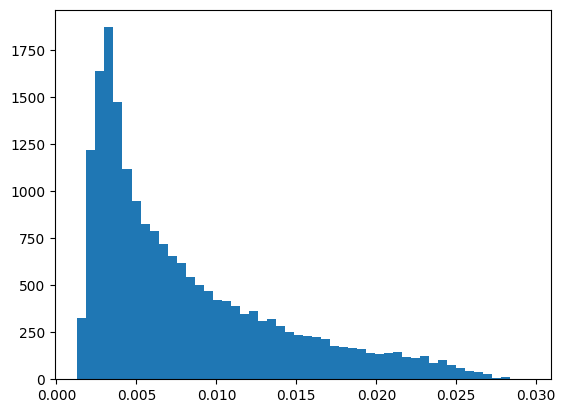

In [67]:
plt.hist(bdf.beta_error, bins='auto')
plt.show()

In [68]:
(bdf.delta_beta_4_rsigms_4_tsigms ** 2 / bdf.beta_error ** 2).dropna().sum()

9519.443443888053

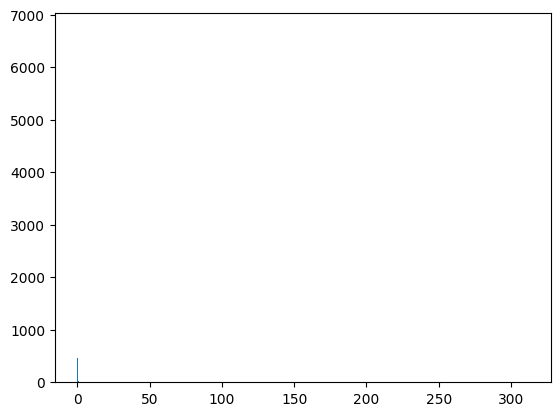

In [69]:
plt.hist((bdf.delta_beta_4_rsigms_4_tsigms ** 2 / bdf.beta_error ** 2).dropna(), bins='auto')
plt.show()

In [65]:
print(bdf[round((bdf.momentum / bdf.beta * np.sqrt(1 - bdf.beta ** 2)), 2) == 139.57].shape[0] / bdf.shape[0])

1.0


In [66]:
beta_on_grid = lin_move_to_grid(np.array(bdf.beta), np.linspace(min(bdf.beta), max(bdf.beta), 100))
calc_beta_on_grid = lin_move_to_grid(np.array(bdf.beta_from_calc_r_4_rsigms_4_tsigms), np.linspace(min(bdf.beta), max(bdf.beta), 100))

((beta_on_grid - calc_beta_on_grid) ** 2 / calc_beta_on_grid).sum() / num_of_calibration_params

0.11142587966007862

In [92]:
bdf

r_c_mean    r_c_std  r_c_width     momentum      beta  signal_counts  \
0      19.824000  10.415134  33.600000   522.711615  0.966152           10.0   
1      17.112284  10.228984  31.338890   510.819201  0.964641            9.0   
2      23.686818  12.321210  40.320000   506.759171  0.964103           22.0   
3      15.865663   9.883064  26.125306   509.218455  0.964430            8.0   
4      13.207577   9.583944  31.993310   509.778346  0.964504           11.0   
...          ...        ...        ...          ...       ...            ...   
19848  33.390079  15.190473  50.400000  1142.331723  0.992619           41.0   
19849  40.265913  17.898905  60.351518  1443.331169  0.995357           37.0   
19850  37.103190  15.850883  53.760000  1375.012514  0.994888           35.0   
19851  35.233313  21.246919  67.200000  1481.018363  0.995589           40.0   
19852  47.452199  16.550165  57.120000  1272.214168  0.994036           55.0   

       param_group   theta_p  cos_theta_p  \
0              1.0  0.124085     0.992311   
1              1.0  0.454187     0.898618   
2              1.0  0.761376     0.723888   
3              1.0  0.117904     0.993057   
4              1.0  0.307330     0.953145   
...            ...       ...          ...   
19848         10.0  0.034152     0.999417   
19849         10.0  0.501060     0.877074   
19850         10.0  0.232915     0.972998   
19851         10.0  0.593498     0.828989   
19852         10.0  0.589408     0.831270   

       unfixed_calculated_r_2d_4_rsigms_4_tsigms  \
0                                      22.755205   
1                                      25.751899   
2                                      39.519886   
3                                      25.321468   
4                                      22.301871   
...                                          ...   
19848                                  47.323455   
19849                                  59.134292   
19850                                  49.972988   
19851                                  65.799609   
19852                                  61.385622   

       beta_from_calc_r_4_rsigms_4_tsigms  delta_beta_4_rsigms_4_tsigms  \
0                                0.965413                     -0.000739   
1                                0.966322                      0.001681   
2                                0.966481                      0.002378   
3                                0.968059                      0.003629   
4                                0.963904                     -0.000600   
...                                   ...                           ...   
19848                                 NaN                           NaN   
19849                                 NaN                           NaN   
19850                                 NaN                           NaN   
19851                                 NaN                           NaN   
19852                                 NaN                           NaN   

       eps_beta_4_rsigms_4_tsigms  beta_error  
0                       -0.076500    0.001884  
1                        0.174217    0.004775  
2                        0.246702    0.012765  
3                        0.376268    0.002000  
4                       -0.062234    0.003018  
...                           ...         ...  
19848                         NaN    0.003163  
19849                         NaN    0.011906  
19850                         NaN    0.005076  
19851                         NaN    0.016567  
19852                         NaN    0.015025  

[19713 rows x 14 columns]

In [69]:
group = 8
# bdf_group = bdf[bdf.param_group == group]
bdf_group = bdf
# Create the subplot layout: 2 rows, 3 columns
fig = make_subplots(
    rows=2, cols=3, 
    subplot_titles=("Histogram 1", "Histogram 2", "Histogram 3", "2D Histogram 1", "2D Histogram 2", "3D Scatter"),
    specs=[[{}, {}, {}], [{}, {}, {'type': 'scatter3d'}]], # Last subplot is 3D
)

# Subplot 1: Histogram
hist1 = go.Histogram(
    x=(bdf_group.momentum / bdf_group.beta_from_calc_r_4_rsigms_4_tsigms * np.sqrt(1 - bdf_group.beta_from_calc_r_4_rsigms_4_tsigms ** 2)).dropna()
)
fig.add_trace(hist1, row=1, col=1)

# Subplot 2: Histogram
# hist2 = go.Histogram(x=bdf_group.chi2)
# fig.add_trace(hist2, row=1, col=2)

fig.update_xaxes(type="log", row=1, col=2, range=[-10, 2])
fig.update_yaxes( row=1, col=2, range=[0, 1000])

# Subplot 3: Histogram
hist3 = go.Histogram(x=bdf_group.beta)
fig.add_trace(hist3, row=1, col=3)

# Subplot 4: 2D Histogram
hist2d_1 = go.Histogram2d(
    x=bdf_group.delta_beta_4_rsigms_4_tsigms, 
    y=bdf_group.beta,
    nbinsx=40, nbinsy=40,
    colorbar=dict(title="Colorbar 1", len=0.4, y=0.19, x=0.29)
)
fig.add_trace(hist2d_1, row=2, col=1)

# Subplot 5: 2D Histogram
hist2d_2 = go.Histogram2d(
    x=bdf_group.beta_from_calc_r_4_rsigms_4_tsigms, 
    y=bdf_group.beta,
    nbinsx=40, nbinsy=40,
    colorbar=dict(title="Colorbar 2", len=0.4, y=0.19, x=0.645)
)
fig.add_trace(hist2d_2, row=2, col=2)

line = go.Line(
    x=[0.965, 1],
    y=[0.965, 1],
)

fig.add_trace(line, row=2, col=2)

# Subplot 6: 3D Scatter plot
scatter3d = go.Scatter3d(
    x=bdf_group.unfixed_calculated_r_2d_4_rsigms_4_tsigms,
    y=bdf_group.theta_p,
    z=bdf_group.beta,
    mode='markers',
    marker=dict(size=1, color='red')
)
fig.add_trace(scatter3d, row=2, col=3)

# x = np.linspace(20, 70, 100)
# y = np.linspace(0, 0.8, 100)
# x, y = np.meshgrid(x, y)
# z = pol2_pol2((x, y), *cal_arr[0][0])
# 
# plane3d = go.Surface(x=x,
#                      y=y,
#                      z=z,
#                      opacity=0.7,
#                      colorscale='Viridis',
#                      colorbar=dict(title="Colorbar 3", len=0.4, y=0.19, x=0.97)
# )
# 
# fig.add_trace(plane3d, row=2, col=3)


# Update layout
fig.update_layout(
    height=800*1.8, width=1200*1.8,
    title_text="Multiple Subplots with Plotly",
    template="plotly_dark",
    showlegend=False
)

# Show plot
fig.show()

Z:\Prog\FARICH\venv\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




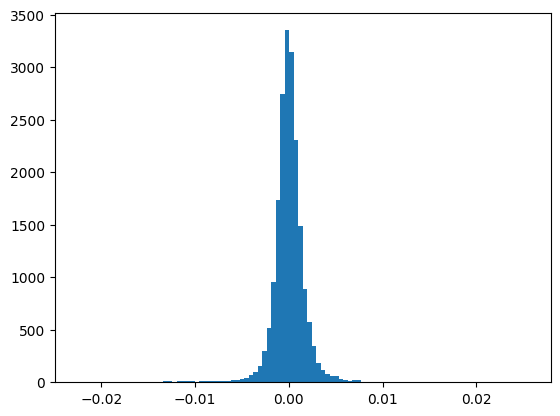

In [70]:
plt.hist(bdf.delta_beta_4_rsigms_4_tsigms, bins=100)
plt.show()

In [95]:
ф

NameError: name 'ф' is not defined

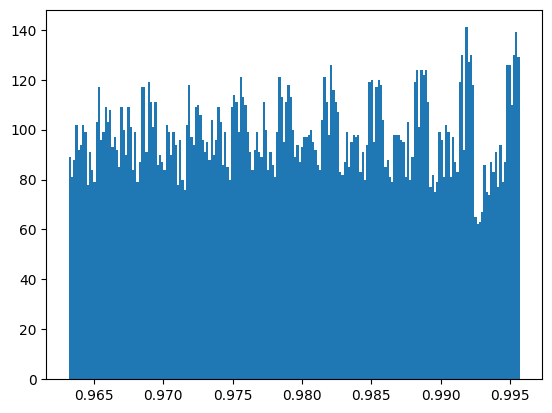

In [128]:
plt.hist(bdf.beta, bins=200)
plt.show()

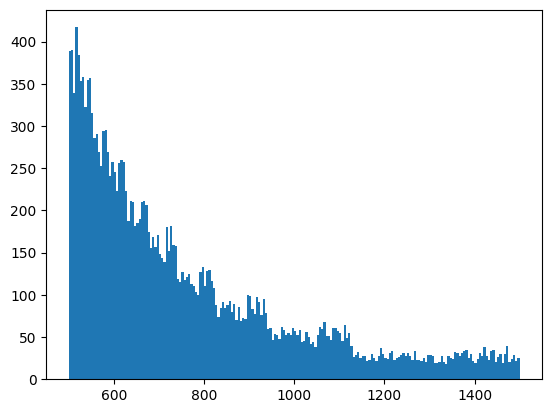

In [119]:
plt.hist(bdf.momentum, bins=200)
plt.show()

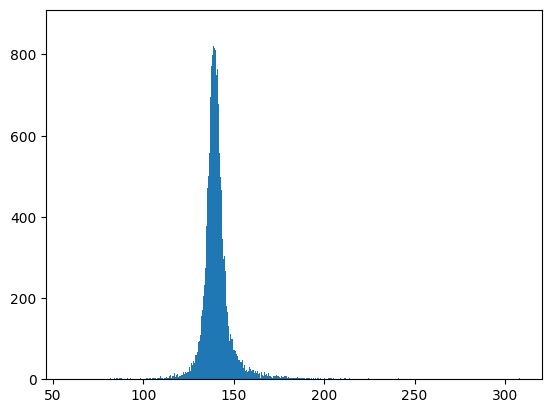

In [71]:
plt.hist((bdf.momentum / bdf.beta_from_calc_r_4_rsigms_4_tsigms * np.sqrt(1 - bdf.beta_from_calc_r_4_rsigms_4_tsigms ** 2)).dropna(), bins='auto')
plt.show()

In [72]:
bg = betaGroupsRMS90(bdf, avg_sigmas=avg_sigmas, avg_t_sigmas=avg_t_sigmas, n=num_of_groups)
beta_sigms.append(bg[0])
beta_sigms_yerr.append(bg[2])

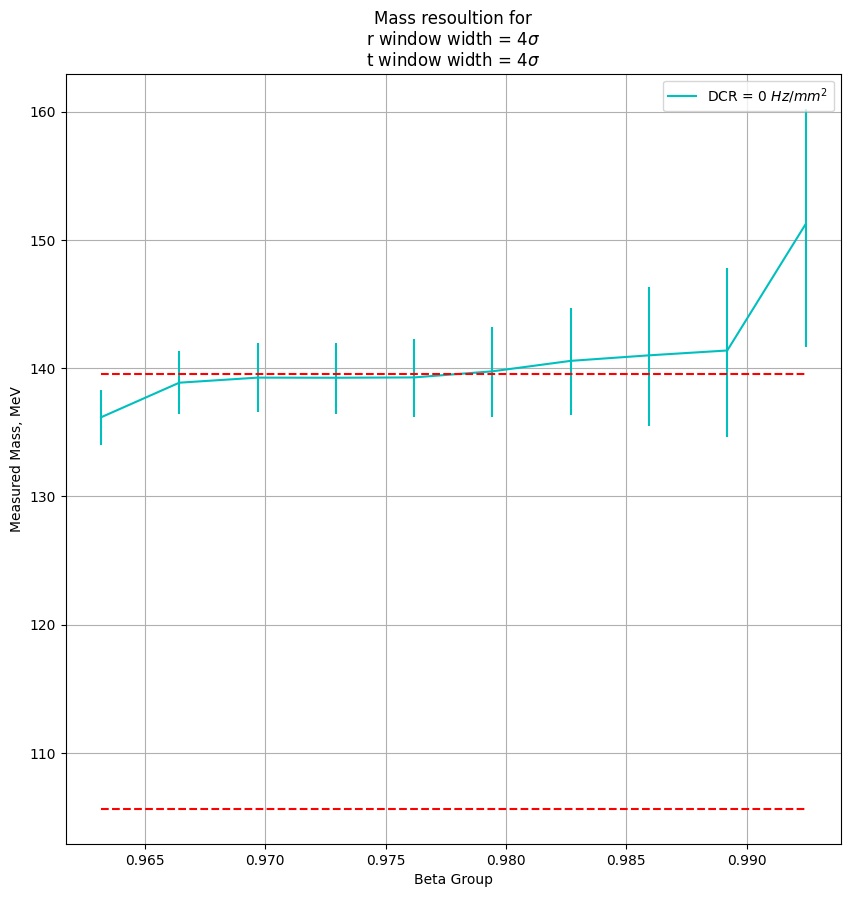

In [73]:
plot_final_mass_graph(edf, bg[3], bg[4], bg[5], avg_sigmas, avg_t_sigmas, r_width, t_width, r_factor, t_factor, weighed, to_save=False, deg_lim=False, num_of_groups=num_of_groups, iteration=0)

In [74]:
beta_sigms = np.array(beta_sigms)
beta_sigms_yerr = np.array(beta_sigms_yerr)

In [75]:
plot_final_graph(edf, beta_sigms, beta_sigms_yerr, avg_sigmas, avg_t_sigmas, r_width, t_width, r_factor, t_factor, weighed, deg_lim=False, num_of_groups=num_of_groups, iteration=0)

In [108]:
edf_d = edf[edf.theta_p <= 10. * np.pi / 180]
edf_d = edf_d[edf_d.signal_counts >= 5]
bdf_d = bdf[bdf.theta_p <= 10. * np.pi / 180]
bdf_d = bdf_d[bdf_d.signal_counts >= 5]

In [109]:
bg_deglim = betaGroupsRMS90(bdf_d, avg_sigmas=avg_sigmas, avg_t_sigmas=avg_t_sigmas, n=num_of_groups)
beta_sigms_deglim.append(bg_deglim[0])
beta_sigms_yerr_deglim.append(bg_deglim[2])

Z:\Prog\FARICH\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

invalid value encountered in sqrt



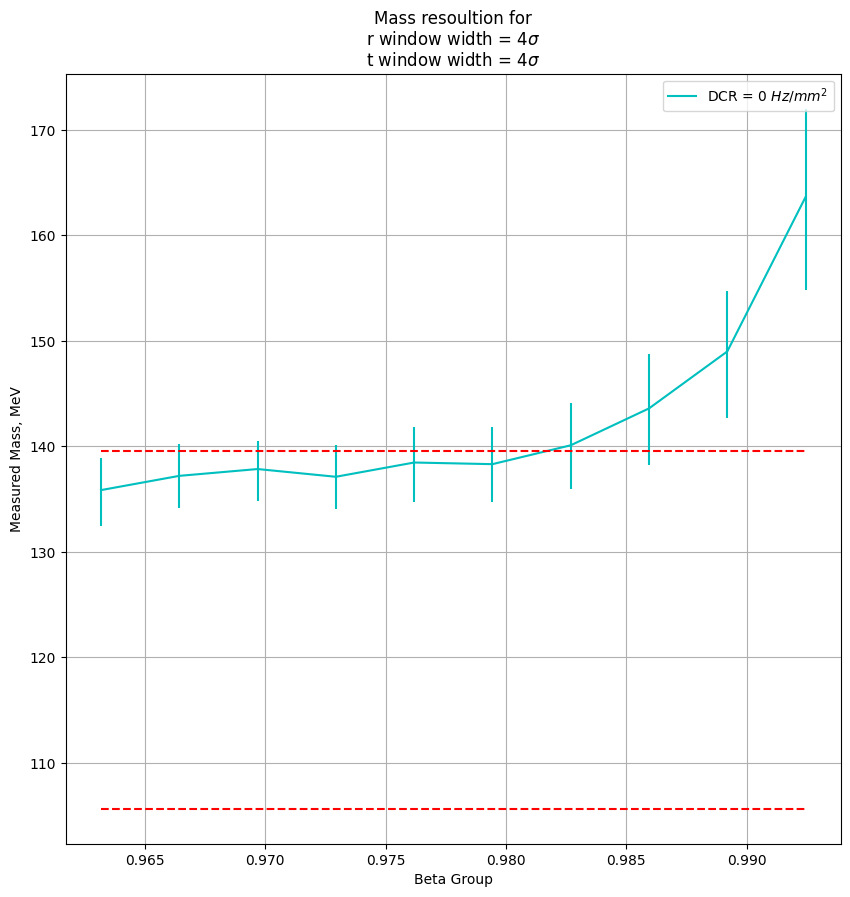

In [110]:
plot_final_mass_graph(edf, bg_deglim[3], bg_deglim[4], bg_deglim[5], avg_sigmas, avg_t_sigmas, r_width, t_width, r_factor, t_factor, weighed, to_save=False, deg_lim=True, num_of_groups=num_of_groups, iteration=0)

In [111]:
beta_sigms_deglim = np.array(beta_sigms_deglim)
beta_sigms_yerr_deglim = np.array(beta_sigms_yerr_deglim)

In [112]:
plot_final_graph(edf, beta_sigms_deglim, beta_sigms_yerr_deglim, avg_sigmas, avg_t_sigmas, r_width, t_width, r_factor, t_factor, weighed, deg_lim=True, num_of_groups=num_of_groups, iteration=0)

# End of main